# Analyzing Movie and Review Data

>Objective: The project aims to analyze movie ratings to uncover patterns and influencing factors. This includes evaluating top-rated movies, exploring genre-specific average ratings, tracking monthly rating trends, and examining fluctuations by release year. The findings are intended to provide actionable insights for film producers and marketers on improving movie quality and timing strategies.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [171]:
movies = pd.read_csv('movies.csv')
reviews = pd.read_csv('reviews.csv')

In [88]:
movies

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980
...,...,...,...,...
95,96,The Sixth Sense,Drama,1999
96,97,The Social Network,Crime,2001
97,98,Slumdog Millionaire,Drama,1994
98,99,Life of Pi,Action,2017


In [89]:
reviews

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13
...,...,...,...,...,...
295,296,67,Zane Carter,9.6,2020-06-20
296,297,54,Charlie Davis,5.4,2020-06-04
297,298,10,Liam Garcia,3.5,2020-05-16
298,299,11,Uma King,3.0,2020-02-04


In [90]:
merged_data = movies.merge(reviews, how = 'inner', on = 'movie_id')
merged_data

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
...,...,...,...,...,...,...,...,...
295,99,Life of Pi,Action,2017,12,Olivia Clark,4.8,2020-07-23
296,99,Life of Pi,Action,2017,257,Olivia Clark,2.1,2020-04-22
297,100,The Aviator,Sci-Fi,2004,77,Mia Martinez,8.3,2020-01-17
298,100,The Aviator,Sci-Fi,2004,78,Kathy Thompson,6.5,2020-10-13


In [91]:
merged_data.duplicated().sum()

0

In [92]:
merged_data.isnull().sum()

movie_id        0
title           0
genre           0
release_year    0
review_id       0
reviewer        0
rating          0
review_date     0
dtype: int64

In [93]:
merged_data.dropna(inplace=True) 
merged_data

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
...,...,...,...,...,...,...,...,...
295,99,Life of Pi,Action,2017,12,Olivia Clark,4.8,2020-07-23
296,99,Life of Pi,Action,2017,257,Olivia Clark,2.1,2020-04-22
297,100,The Aviator,Sci-Fi,2004,77,Mia Martinez,8.3,2020-01-17
298,100,The Aviator,Sci-Fi,2004,78,Kathy Thompson,6.5,2020-10-13


## 1. Highest Rated Movies

In [94]:
average_ratings = merged_data.groupby('movie_id')['rating'].mean()
average_ratings

movie_id
1      7.450000
3      9.800000
4      4.800000
6      4.480000
7      5.533333
         ...   
96     6.900000
97     6.075000
98     5.166667
99     3.450000
100    7.466667
Name: rating, Length: 96, dtype: float64

In [108]:
top_10 = average_ratings.sort_values(ascending=False).head(10)
top_10

movie_id
3     9.800
62    9.350
67    9.250
85    8.600
84    8.000
12    8.000
41    8.000
63    7.650
80    7.625
37    7.500
Name: rating, dtype: float64

In [96]:
top_10_with_titles = pd.merge(top_10, movies[['movie_id', 'title']], on='movie_id')
top_10_with_titles

,movie_id,rating,title
0,3,9.800,The Dark Knight
1,62,9.350,Vertigo
2,67,9.250,City Lights
3,85,8.600,Jaws
4,84,8.000,Scarface
5,12,8.000,The Empire Strikes Back
6,41,8.000,Grave of the Fireflies
7,63,7.650,North by Northwest
8,80,7.625,A Beautiful Mind
9,37,7.500,Oldboy


## 2. Genre Analysis

In [97]:
average_rating_by_genre = merged_data.groupby('genre')['rating'].mean()
average_rating_by_genre

genre
Action       5.109375
Biography    5.279310
Crime        4.901493
Drama        5.204478
Fantasy      5.768421
Sci-Fi       6.118421
Name: rating, dtype: float64

In [98]:
top_1 = average_rating_by_genre.sort_values(ascending=False).head(1)
top_1

genre
Sci-Fi    6.118421
Name: rating, dtype: float64

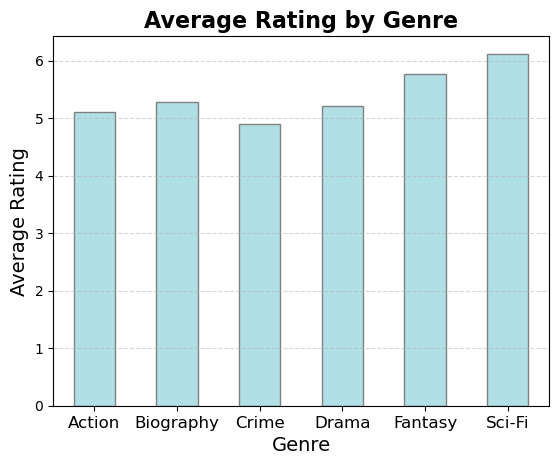

In [34]:
average_rating_by_genre.plot(kind='bar', color='#B0E0E6', edgecolor='grey')

plt.title('Average Rating by Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

plt.xticks(fontsize=12, rotation=360)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5) 

plt.show()

**Insights**: Among the genres and their average ratings, **Sci-Fi** stands out with the highest rating of 6.1.<br> However, the difference between the highest and lowest ratings is relatively small.

## 3. Reviewer Analysis

In [109]:
top_viwers = merged_data['reviewer'].value_counts().head(5)
top_viwers

reviewer
Tom Young       18
Uma King        16
Henry Harris    15
John Smith      14
Ivy White       13
Name: count, dtype: int64

In [110]:
filtered_data = merged_data[merged_data['reviewer'].isin(top_reviewers)]
filtered_data

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
8,6,The Lord of the Rings: The Return of the King,Crime,2010,41,Henry Harris,1.5,2020-10-17
19,10,The Matrix,Biography,2018,198,Ivy White,5.7,2020-04-29
...,...,...,...,...,...,...,...,...
282,95,Whale Rider,Action,1988,68,Tom Young,6.7,2020-07-15
283,95,Whale Rider,Action,1988,73,Tom Young,5.2,2020-04-05
289,97,The Social Network,Crime,2001,229,Uma King,8.4,2020-08-08
294,98,Slumdog Millionaire,Drama,1994,110,Tom Young,6.7,2020-09-24


In [111]:
top_reviewers_avg_rating = filtered_data.groupby('reviewer')['rating'].mean().reset_index()
top_reviewers_avg_rating

,reviewer,rating
0,Henry Harris,4.473333
1,Ivy White,4.669231
2,John Smith,4.542857
3,Tom Young,5.400000
4,Uma King,5.500000


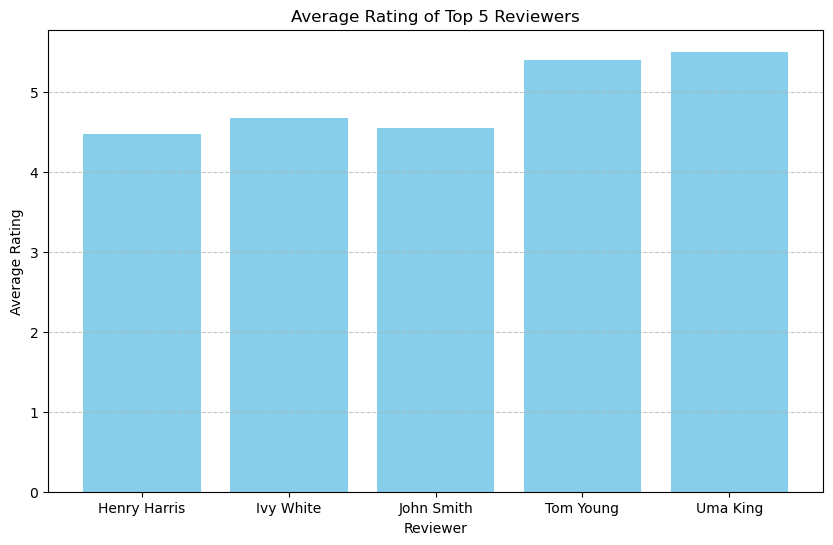

In [114]:
plt.figure(figsize=(10, 6))

plt.bar(top_reviewers_avg_rating['reviewer'], top_reviewers_avg_rating['rating'], color='skyblue')
plt.xlabel('Reviewer')
plt.ylabel('Average Rating')
plt.title('Average Rating of Top 5 Reviewers')
 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Review Consistency

In [116]:
reviewer_consistency = merged_data.groupby('reviewer')['rating'].std().reset_index()
reviewer_consistency.columns = ['reviewer', 'rating_std']
reviewer_consistency

,reviewer,rating_std
0,Alice Johnson,3.293094
1,Bob Brown,2.961681
2,Charlie Davis,2.205145
3,Emily Evans,2.277645
4,Frank Wilson,2.596618
5,Grace Lee,2.192273
6,Henry Harris,2.610273
7,Ivy White,1.875449
8,Jack Martin,2.849389
9,Jane Doe,2.718823


In [117]:
most_consistent_reviewer = reviewer_consistency.sort_values(by='rating_std').head(1)
least_consistent_reviewer = reviewer_consistency.sort_values(by='rating_std', ascending=False).head(1)

In [202]:
print("Most Consistent Reviewer:")
most_consistent_reviewer

Most Consistent Reviewer:


,reviewer,rating_std
14,Noah Robinson,1.773415


In [203]:
print("\nLeast Consistent Reviewer:")
least_consistent_reviewer


Least Consistent Reviewer:


,reviewer,rating_std
26,Zane Carter,3.567718


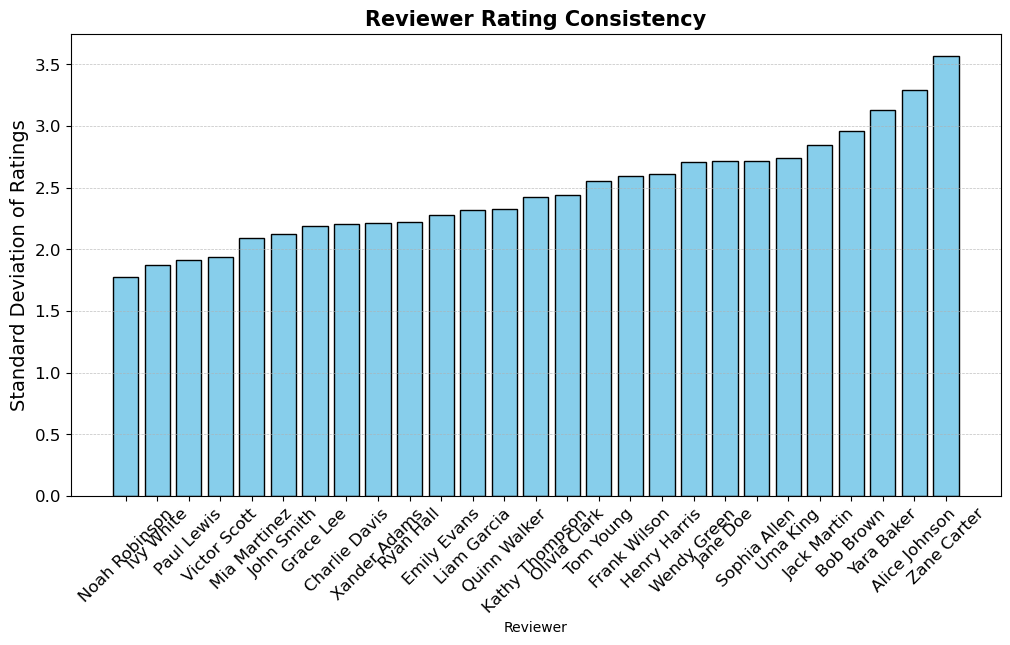

In [213]:
plt.figure(figsize=(12, 6))

reviewer_consistency_sorted = reviewer_consistency.sort_values(by='rating_std')

plt.bar(reviewer_consistency_sorted['reviewer'], 
        reviewer_consistency_sorted['rating_std'], 
        color='skyblue', 
        edgecolor='black')

plt.title('Reviewer Rating Consistency', fontsize=15, fontweight='bold')
plt.xlabel('Reviewer', fontsize=10)
plt.ylabel('Standard Deviation of Ratings', fontsize=14)
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.8) 

plt.show()

## 5. Monthly Time-Based Analysis

In [119]:
average_ratings = merged_data.groupby('title')['rating'].mean().reset_index()
average_ratings

,title,rating
0,3 Idiots,3.300000
1,A Beautiful Mind,7.625000
2,A Clockwork Orange,7.300000
3,Alien,3.133333
4,Aliens,5.400000
...,...,...
91,Vertigo,9.350000
92,WALL-E,6.000000
93,Whale Rider,4.250000
94,Whiplash,7.300000


In [120]:
merged_data['review_month'] = pd.to_datetime(merged_data['review_date']).dt.to_period('M')
monthly_ratings = merged_data.groupby('review_month')['rating'].mean().reset_index()
monthly_ratings

,review_month,rating
0,2020-01,5.209677
1,2020-02,4.755172
2,2020-03,5.583871
3,2020-04,5.213333
4,2020-05,6.048387
5,2020-06,5.623333
6,2020-07,5.338710
7,2020-08,4.858065
8,2020-09,5.456667
9,2020-10,5.138462


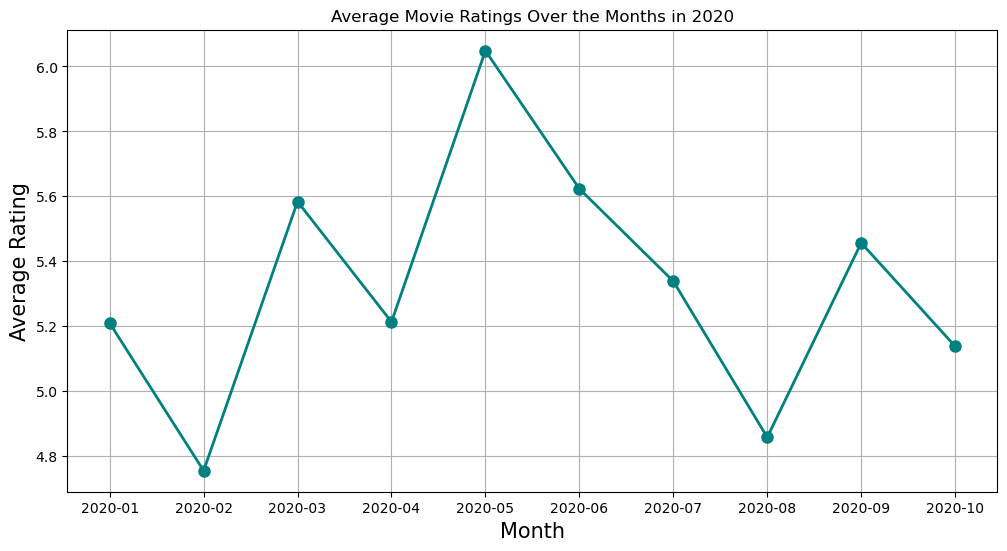

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings['review_month'].astype(str), monthly_ratings['rating'], 
         marker='o', color='teal', linestyle='-', linewidth=2, markersize=8, label='Average Rating')

plt.title('Average Movie Ratings Over the Months in 2020')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.grid(True)

plt.show()

**Insights**: The line plot illustrates the average movie ratings over the months of 2020. By examining this plot, we can track how movie ratings varied each month throughout the year. Notably, there is a significant peak in average ratings in May, which could be attributed to major movie releases, special events, or seasonal viewing habits that boost ratings. Conversely, the dips in ratings observed in February and August suggest that there might have been fewer high-quality movies reviewed during these months or a decline in viewer engagement. 

## 6. Movies with Most Reviews

In [132]:
top_10_reviewed_movies = merged_data['title'].value_counts().head(10).reset_index()
top_10_reviewed_movies.columns = ['title', 'review_count']
top_10_reviewed_movies

,title,review_count
0,Interstellar,7
1,Full Metal Jacket,7
2,The Revenant,6
3,Capernaum,6
4,The Truman Show,6
5,Paths of Glory,6
6,Shutter Island,6
7,Memento,6
8,It's a Wonderful Life,6
9,Eternal Sunshine of the Spotless Mind,5


## 7. Distribution of Ratings

In [124]:
ratings = reviews['rating']
ratings

0      8.0
1      1.8
2      1.8
3      5.2
4      6.3
      ... 
295    9.6
296    5.4
297    3.5
298    3.0
299    3.5
Name: rating, Length: 300, dtype: float64

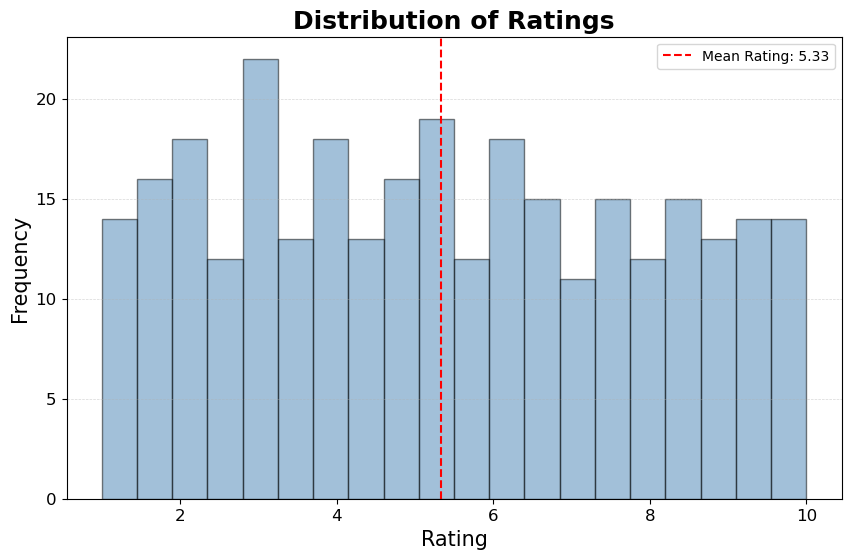

In [126]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['rating'], bins=20, edgecolor='black', color='#4682B4', alpha=0.5)

plt.title('Distribution of Ratings', fontsize=18, fontweight='bold')
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

mean_rating = merged_data['rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', label=f'Mean Rating: {mean_rating:.2f}')
plt.legend()

plt.show()

**Insights**: The histogram illustrates the distribution of movie ratings, allowing us to see how ratings are distributed across various values. The visualization reveals that the ratings are relatively evenly spread, with no particular value dominating the distribution.

## 7. Impact of Release Year:

In [129]:
release_year_ratings = merged_data.groupby('release_year')['rating'].mean().reset_index()
release_year_ratings

,release_year,rating
0,1980,4.533333
1,1981,4.280000
2,1982,4.975000
3,1983,6.300000
4,1984,3.980000
5,1985,5.663636
6,1986,5.910000
7,1987,5.700000
8,1988,5.950000
9,1990,4.475000


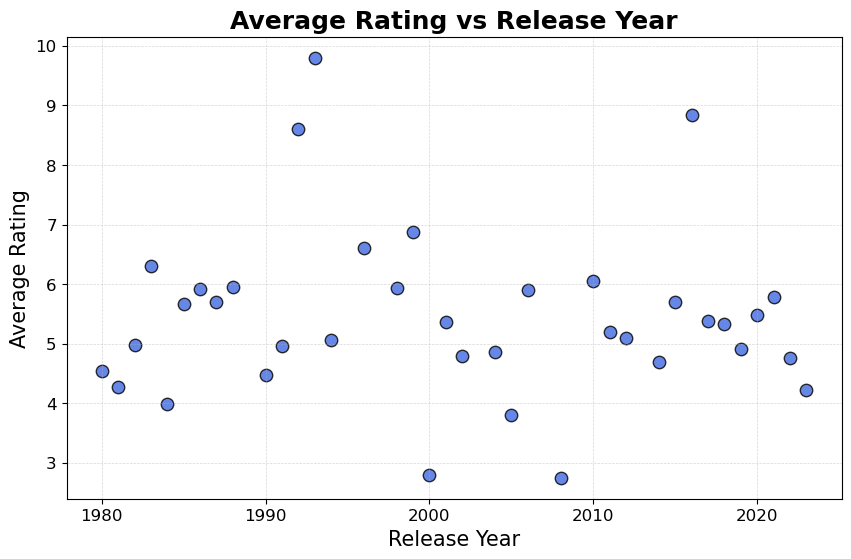

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(release_year_ratings['release_year'], 
            release_year_ratings['rating'], 
            alpha=0.8,               
            color='royalblue',      
            edgecolor='black',      
            s=80)                    

plt.title('Average Rating vs Release Year', fontsize=18, fontweight='bold')
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5) 

plt.show()

**Insights**: The chart depicting average movie ratings by release year shows considerable fluctuations over time. There is no clear, consistent trend of improvement when compared to earlier decades. Notably, the years 1993 and 2017 feature unusually high ratings, suggesting that movie ratings have varied significantly over the years rather than following a steady upward or downward trajectory.

## 8. Monthly Genre Popularity Over Time

In [133]:
genre_month_reviews = merged_data.groupby(['genre', 'review_month'])['review_id'].count().reset_index()
genre_month_reviews.columns = ['genre', 'review_month', 'review_count']
genre_month_reviews

,genre,review_month,review_count
0,Action,2020-01,1
1,Action,2020-02,4
2,Action,2020-03,3
3,Action,2020-04,7
4,Action,2020-05,1
5,Action,2020-06,6
6,Action,2020-07,4
7,Action,2020-08,3
8,Action,2020-09,3
9,Biography,2020-01,8


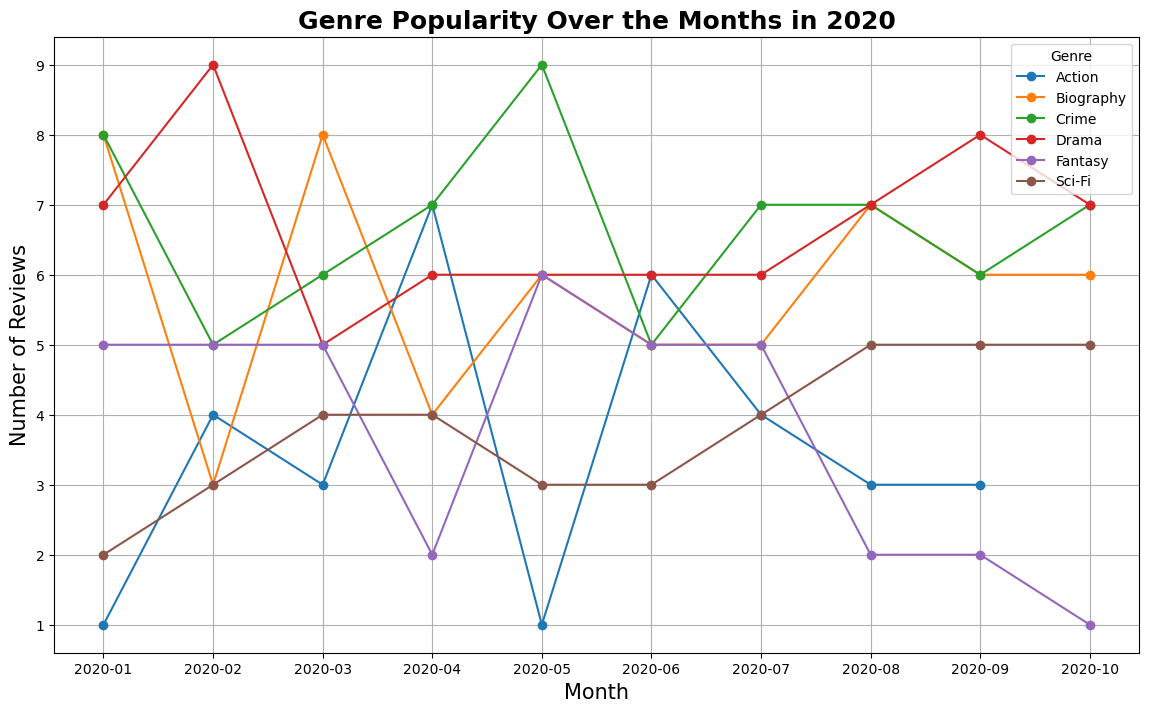

In [137]:
plt.figure(figsize=(14, 8))

for genre in genre_month_reviews['genre'].unique():
    genre_data = genre_month_reviews[genre_month_reviews['genre'] == genre]
    plt.plot(genre_data['review_month'].astype(str), genre_data['review_count'], marker='o', label=genre)

plt.title('Genre Popularity Over the Months in 2020', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.legend(title='Genre')
plt.grid(True)
plt.show()

**Insights**: The line plot illustrates the monthly review counts for each movie genre in 2020, revealing trends in genre popularity throughout the year. For example, Drama films peak in reviews in February and October, likely due to major releases or seasonal viewing habits. Crime movies and Fantasy films show a significant peak in May, indicating strong interest possibly driven by key releases or summer events. Although Sci-Fi films receive the fewest reviews overall, they demonstrate a notable spike in August, likely due to a summer blockbuster, making them the most popular genre among the reviewed ones. Understanding these trends can help movie producers and marketers strategically time their releases and plan promotional activities.

In [139]:
import scipy.stats as stats
correlation, p_value = stats.pearsonr(merged_data['release_year'], merged_data['rating'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: -0.003172696791111094, P-value: 0.9563587884679786


## 9. Correlation Analysis

##### Null Hypothesis = There is no linear relationship between movie ratings and release years.
##### Alternative Hypothesis = There is a significant linear relationship between movie ratings and release years.

In [158]:
correlation, p_value = stats.pearsonr(merged_data['release_year'], merged_data['rating'])
print(f"p_value: {p_value}")

p_value: 0.9563587884679786


In [154]:
if p_value < 0.05:
    print("We'll reject the null hypothesis. There is a significant linear relationship between movie ratings and release years.")
else:
    print("We'll fail to reject the null hypothesis. There is not enough evidence to say there is a significant linear relationship between movie ratings and release years.")

We'll fail to reject the null hypothesis. There is not enough evidence to say there is a significant linear relationship between movie ratings and release years.


##### Null Hypothesis = There is no significant difference in movie ratings among different genres.
##### Alternative Hypothesis = There is a significant difference in movie ratings among different genres.

In [165]:
genres = merged_data['genre'].unique()
genre_ratings = [merged_data[merged_data['genre'] == genre]['rating'] for genre in genres]

f_stat, p_value = f_oneway(*genre_ratings)
print(f'F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}')

F-statistic: 1.3904, P-value: 0.2277


In [166]:
if p_value < 0.05:
    print("We'll reject the null hypothesis. There is a significant difference in movie ratings among different genres.")
else:
    print("We'll fail to reject the null hypothesis. There is not enough evidence to say there is a significant difference in movie ratings among different genres.")

We'll fail to reject the null hypothesis. There is not enough evidence to say there is a significant difference in movie ratings among different genres.


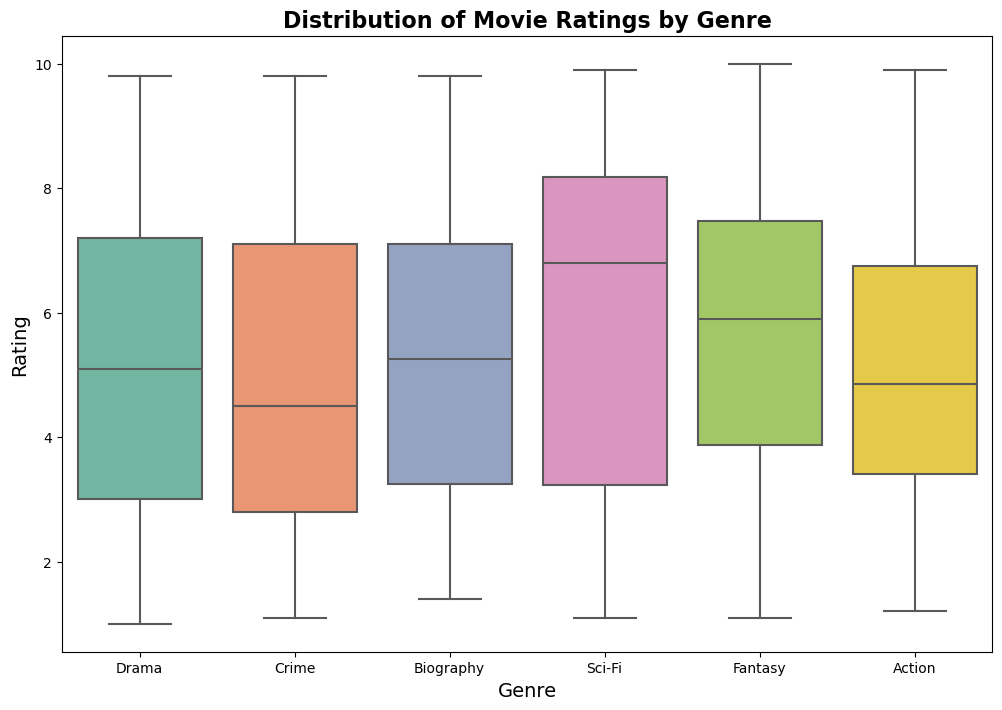

In [169]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='genre', y='rating', data=merged_data, palette='Set2')

plt.title('Distribution of Movie Ratings by Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()

## 10. Conclusion 

Overall, the lack of significant trends in movie ratings over time and across genres implies that **other elements, such as the quality of the films and specific marketing strategies, may be more critical in affecting ratings**. Additionally, the timing of releases does not appear to affect ratings predictably. For film producers and marketers, **prioritizing improvements in movie quality and carefully planning release timing** could be more impactful than focusing solely on particular genres or release dates. **Further investigation into additional factors** could offer deeper insights into what drives movie ratings.